# Task 7

# Referral Id: AIRSS1199

# Name: Tallem Vaishnavi

Q1. Implement gradient descent (for simple linear regression) from scratch.

In [16]:
import numpy as np

In [17]:
class LinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.c = 0
        self.n = len(x)
        
    def fit(self , epochs , lr):
        
        for i in range(epochs):
            y_pred = self.m * self.data + self.c
            
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_c = (-1/self.n)*sum(self.label-y_pred)
            
            self.m = self.m - lr * D_m
            self.c = self.c - lr * D_c
            
    def predict(self , inp):
        y_pred = self.m * inp + self.c 
        return y_pred
    
    def mse(self):
        metric = sum((self.label - self.predict(self.data))**2)/self.n
        return metric
    
    def mae(self):
        metric = sum(abs(self.label - self.predict(self.data)))/self.n
        return metric

The .fit() method implements Gradient Descent, in which the partial derivatives of the function with respect to parameters are calculated with each iteration, and the parameters are then updated using the learning rate and the gradient value.

We are simply evaluating the function y = m * x + b using the optimal values of our parameters with the .predict() method; in other words, this approach calculates the line of best fit.

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

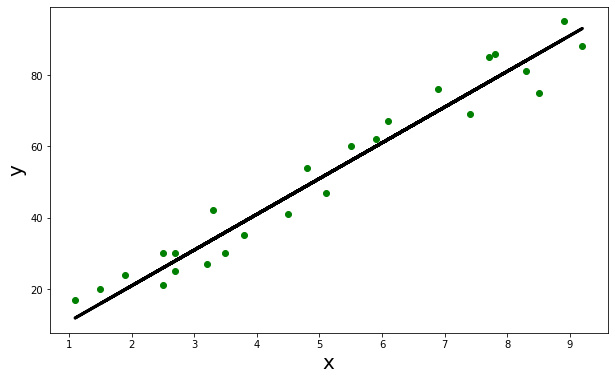

In [19]:
df = pd.read_csv(r'C:\\Users\\gayathri\\Documents\\StudentScores.csv')

x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

regressor = LinearRegression(x,y)

regressor.fit(1000 , 0.0001) 

y_pred = regressor.predict(x)

plt.figure(figsize = (10,6))
plt.scatter(x,y , color = 'green')
plt.plot(x , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

Q2. Kaggle Competition:
    
Introduction:
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science
students who have completed an online course in machine learning and are looking to expand their skill set before trying a
featured competition.

Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling
or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences
price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition
challenges you to predict the final price of each home.

Kaggle Competition Link: https://www.kaggle.com/c/house-prices-advanced-regression-
techniques

Title: House Prices - Advanced Regression Techniques

Aim : Predict the final price of the houses

In [203]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter("ignore")

In [204]:
# load dataset 
df_train = pd.read_csv(r'C:\Users\gayathri\Downloads\REGex@7_HousePrice\train.csv')
df_test = pd.read_csv(r'C:\Users\gayathri\Downloads\REGex@7_HousePrice\test.csv')

In [205]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [206]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [207]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [208]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [210]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

-> The average SalePrice of a house is 180,921

-> The Maximum SalePrice of a house is 755,000 and Minimum 34,900

Text(71.5, 0.5, 'Features')

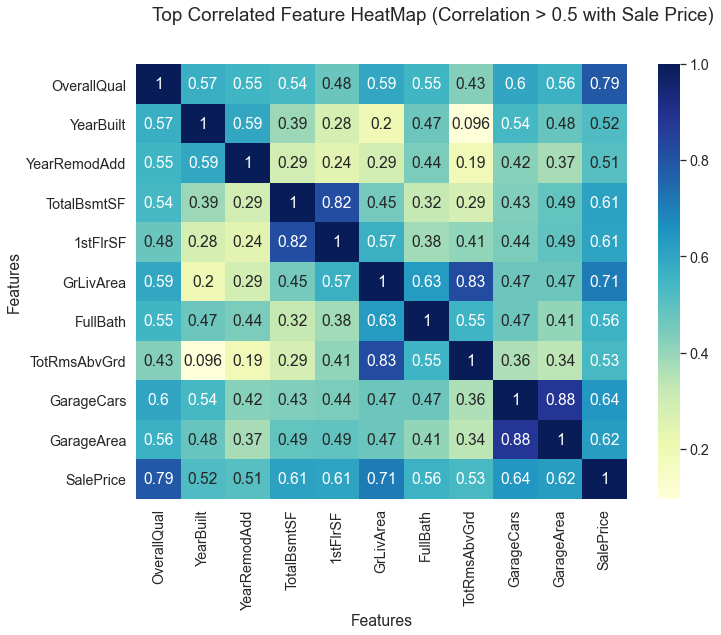

In [211]:
# most correlated features
corr_mat = df_train.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

-> OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [212]:
print("Correlation Values")

corr = df_train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

**Handling Data**

In [213]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

Skewness: 1.882876
Kurtosis: 6.536282


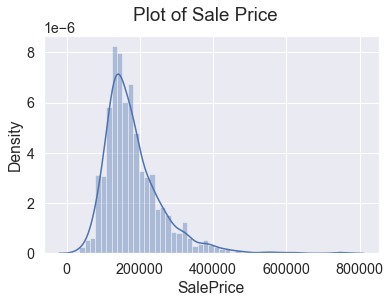

In [214]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

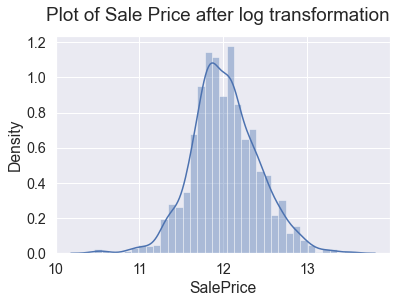

In [215]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [216]:
df_train['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [217]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [218]:
df_train.shape

(1460, 80)

In [219]:
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [220]:
missing_data(df_train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1453         99.520548                 3
MiscFeature                      1406         96.301370                 4
Alley                            1369         93.767123                 2
Fence                            1179         80.753425                 4
FireplaceQu                       690         47.260274                 5
LotFrontage                       259         17.739726               110
GarageYrBlt                        81          5.547945                97
GarageCond                         81          5.547945                 5
GarageType                         81          5.547945                 6
GarageFinish                       81          5.547945                 3
GarageQual                         81          5.547945                 5
BsmtExposure                       38          2.602740                 4
BsmtFinType2                       38 

In [221]:
df_train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [222]:
missing_data(df_test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45          3.084304                 4
BsmtExposure                       44 

In [223]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [224]:
null_train = df_train.isnull().sum().sum()
print(null_train)
null_test = df_test.isnull().sum().sum()
print(null_test)

6965
7000


In [225]:
train_label = df_train['SalePrice'].reset_index(drop=True)
df_train = df_train.drop(['SalePrice'], axis=1)

In [226]:
def missing (df):
    
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    df["Fence"] = df["Fence"].fillna("None") 
    
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    df["Functional"] = df["Functional"].fillna("Typ")
    
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    df["MasVnrType"] = df["MasVnrType"].fillna("None") 
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      
    
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [227]:
df_train = missing(df_train)
df_test = missing(df_test)

In [228]:
null_train = df_train.isnull().sum().sum()
print(null_train)
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [229]:
df_train.shape,df_test.shape

((1460, 75), (1459, 75))

In [230]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [231]:
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [232]:
df_train.shape,df_test.shape

((1460, 80), (1459, 80))

In [233]:
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [234]:
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [235]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1460, 293)
(1459, 278)


In [236]:
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [237]:
print(df_train.shape)
print(df_test.shape)

(1460, 278)
(1459, 278)


In [238]:
null_train = df_train.isnull().sum().sum()
print(null_train)
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [239]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [240]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [241]:
X_test = df_test           
df_train["SalePrice"] = train_label
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,12.429216


In [242]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  
y_train = train_set["SalePrice"].copy()             

X_valid = valid_set.drop(["SalePrice"], axis=1)  
y_valid = valid_set["SalePrice"].copy()               

In [243]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1021, 278)
y_train shape: (1021,)

X_valid shape: (439, 278)
y_valid shape: (439,)

X_test shape: (1459, 278)


In [244]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [245]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
0


In [246]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(439, 278) (439,)



In [253]:
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [254]:
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [255]:
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

**LINEAR REGRESSION**

In [256]:
reg = linear_model.LinearRegression()

In [257]:
cross_validation(reg)

Mean CV score:  0.15295061577660934


In [258]:
model_reg = reg.fit(X_train, y_train)
y1_pred = reg.predict(X_train)
rmse(y1_pred,y_train)

rmse:  0.09466140754438386


In [259]:
y1_pred_v = reg.predict(X_valid)
rmse(y1_pred_v, y_valid)

rmse:  0.17857360260552324


<Figure size 864x864 with 0 Axes>

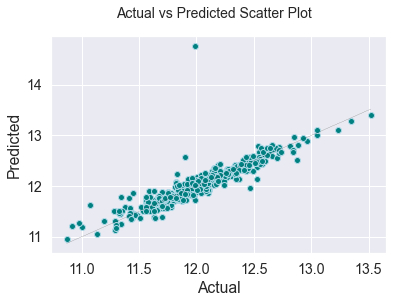

In [260]:
actual_vs_pred_plot(y_valid,y1_pred_v)

**K-NEAREST NEIGHBOUR REGRESSION**

In [261]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)
y4_pred = neigh.predict(X_train)

rmse(y4_pred,y_train)

rmse:  0.17553248510466096


In [262]:
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

y_pred = neigh1.predict(X_train)

rmse(y_pred,y_train)

rmse:  0.18523757974183064


In [263]:
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)
y_pred = neigh2.predict(X_train)
rmse(y_pred,y_train)

rmse:  0.19146734806158877


N=5 performs best

In [264]:
y4_pred_v = neigh.predict(X_valid)

rmse(y4_pred_v, y_valid)

rmse:  0.22646941230235468


rmse increases when values of k(no. of neighbours) increase

<Figure size 864x864 with 0 Axes>

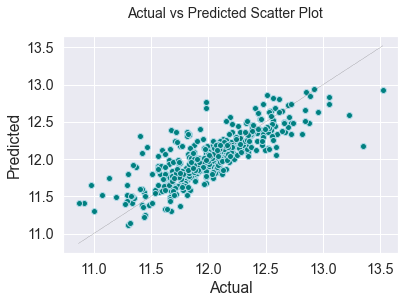

In [265]:
actual_vs_pred_plot(y_valid,y4_pred_v)

**Gradient Boosting Regressor**

In [266]:

gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,min_samples_leaf=7, 
                                 loss='huber', random_state =42) 

In [267]:

gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42) 

In [268]:
cross_validation(gbr1)

Mean CV score:  0.14006799049057947


In [269]:
cross_validation(gbr2)

Mean CV score:  0.14039874171612418


In [270]:
model_gbr1 = gbr1.fit(X_train, y_train)
model_gbr2 = gbr2.fit(X_train, y_train)

y_g1_pred = gbr1.predict(X_train)
y_g2_pred = gbr2.predict(X_train)
rmse(y_g1_pred,y_train)
rmse(y_g2_pred,y_train)

rmse:  0.047415555069503006
rmse:  0.057407603198440856


In [271]:
y8_pred_v = gbr2.predict(X_valid)
rmse(y8_pred_v, y_valid)

rmse:  0.1349672217857058


<Figure size 864x864 with 0 Axes>

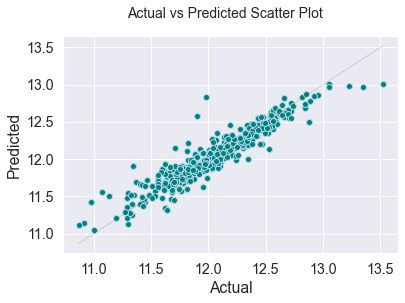

In [272]:
actual_vs_pred_plot(y_valid, y8_pred_v)

**STACKED REGRESSOR**

In [273]:
estimators = [("K",neigh)]

In [274]:
stacked = StackingRegressor(estimators = estimators, final_estimator = neigh, cv=5)

In [275]:
cross_validation(stacked)

Mean CV score:  0.23581077802372022


In [276]:
model_stack = stacked.fit(X_train, y_train)
y9_pred = stacked.predict(X_train)
rmse(y9_pred,y_train)

rmse:  0.19904304268108763


In [277]:
y9_pred_v = stacked.predict(X_valid)
rmse(y9_pred_v, y_valid)

rmse:  0.24116488064318242


<Figure size 864x864 with 0 Axes>

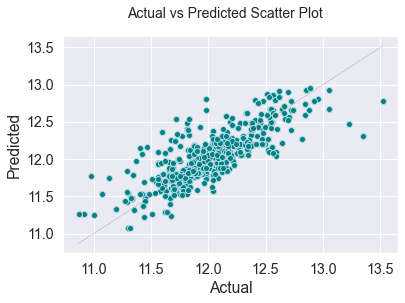

In [278]:
actual_vs_pred_plot(y_valid,y9_pred_v)

**TEST DATA PREDICTION**

In [279]:
df_sample = pd.read_csv(r'C:\Users\gayathri\Downloads\REGex@7_HousePrice\sample_submission.csv')

In [280]:
df_sample.shape

(1459, 2)

In [281]:
df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [282]:
X_test.shape

(1459, 278)

In [283]:
y_final_pred = stacked.predict(X_test)
y_final_pred

array([11.86100325, 12.27409013, 12.0722896 , ..., 12.21885917,
       11.47774383, 12.25761152])

In [284]:
predictions = np.expm1(y_final_pred)
print(predictions)

[141633.24127096 214075.8050699  174954.96629716 ... 202572.72379747
  96542.00460638 210577.02298621]


In [285]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predictions
submit.to_csv('submission.csv',index=False)

In [202]:
submit

,Id,SalePrice
0,1461,141633.241271
1,1462,214075.805070
2,1463,174954.966297
3,1464,188196.014075
4,1465,129579.781841
...,...,...
1454,2915,76119.897546
1455,2916,89482.906568
1456,2917,202572.723797
1457,2918,96542.004606
